https://www.kaggle.com/vforvince1/visualizing-data-and-predicting-pokemon-fights

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('data/pokemon.csv')
combats=pd.read_csv('data/combats.csv')
test=pd.read_csv('data/tests.csv')
prediction=test.copy()

In [3]:
train.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
train['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

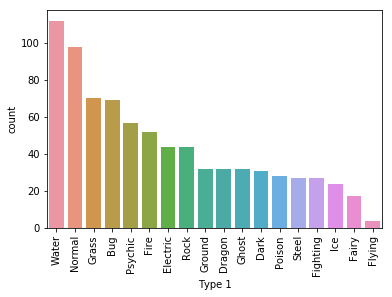

In [5]:
sns.countplot(x='Type 1',data=train,order=train['Type 1'].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

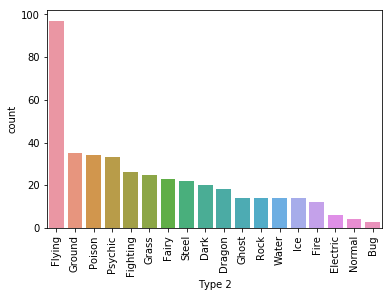

In [6]:
sns.countplot(x='Type 2',data=train,order=train['Type 2'].value_counts().index)
plt.xticks(rotation=90)

In [7]:
train.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [8]:
train['Totalstatus']=train['HP']+train['Attack']+train['Defense']+train['Sp. Atk']+train['Sp. Def']+train['Speed']

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


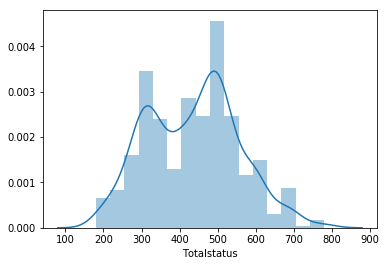

In [9]:
sns.distplot(train['Totalstatus'])

In [10]:
avg_total_status=int(train['Totalstatus'].mean())
avg_total_status

435

In [11]:
sorted_pokemon=train.sort_values(by='Totalstatus')

print(sorted_pokemon[['Name','Totalstatus']].head(10))

           Name  Totalstatus
206     Sunkern          180
322     Azurill          190
446   Kricketot          194
288     Wurmple          195
16       Weedle          195
13     Caterpie          195
303       Ralts          198
732  Scatterbug          200
139    Magikarp          200
381      Feebas          200


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#              800 non-null int64
Name           799 non-null object
Type 1         800 non-null object
Type 2         414 non-null object
HP             800 non-null int64
Attack         800 non-null int64
Defense        800 non-null int64
Sp. Atk        800 non-null int64
Sp. Def        800 non-null int64
Speed          800 non-null int64
Generation     800 non-null int64
Legendary      800 non-null bool
Totalstatus    800 non-null int64
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [13]:
print(sorted_pokemon[['Name','Totalstatus','Legendary']].tail(10))

                    Name  Totalstatus  Legendary
413       Mega Metagross          700      False
409       Mega Salamence          700      False
494        Mega Garchomp          700      False
712  Kyurem White Kyurem          700       True
552               Arceus          720       True
424       Primal Groudon          770       True
422        Primal Kyogre          770       True
164        Mega Mewtwo Y          780       True
426        Mega Rayquaza          780       True
163        Mega Mewtwo X          780       True


In [14]:
legendary_pokemon=train.loc[train['Legendary']==True]

legendary_pokemon=legendary_pokemon.sort_values(by='Totalstatus')

print(legendary_pokemon[['Name','Totalstatus']].head(20))

                          Name  Totalstatus
156                   Articuno          580
539                      Azelf          580
699                   Cobalion          580
700                  Terrakion          580
701                   Virizion          580
702   Tornadus Incarnate Forme          580
703     Tornadus Therian Forme          580
704  Thundurus Incarnate Forme          580
538                    Mesprit          580
416                  Registeel          580
415                     Regice          580
705    Thundurus Therian Forme          580
158                    Moltres          580
157                     Zapdos          580
414                   Regirock          580
262                     Raikou          580
537                       Uxie          580
264                    Suicune          580
263                      Entei          580
794         Zygarde Half Forme          600


In [15]:
train.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Totalstatus
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


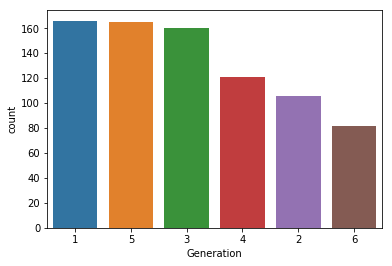

In [16]:
sns.countplot(x='Generation',data=train,order=train.Generation.value_counts().index)

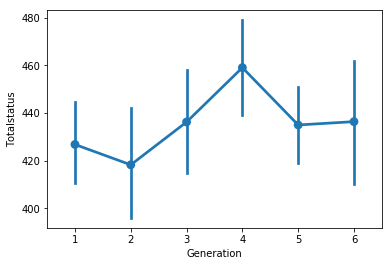

In [17]:
sns.pointplot(x='Generation',y='Totalstatus',data=train)

In [18]:
#Exploring pokemon based on battles

In [22]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [21]:
name_dict=dict(zip(train['#'],train['Name']))
combats_df=combats[['First_pokemon','Second_pokemon','Winner']].replace(name_dict)

print(combats_df.head())

  First_pokemon Second_pokemon     Winner
0      Larvitar        Nuzleaf    Nuzleaf
1      Virizion      Terrakion  Terrakion
2       Togetic       Beheeyem   Beheeyem
3        Slugma      Druddigon  Druddigon
4       Omastar        Shuckle    Omastar


In [23]:
first_battle=combats_df['First_pokemon'].value_counts()

In [24]:
second_battle=combats_df['Second_pokemon'].value_counts()
win_counts=combats_df['Winner'].value_counts()

total_battle=first_battle+second_battle


In [25]:
win_percent=win_counts/total_battle

In [26]:
win_percent=win_percent.sort_values()

In [27]:
print(win_percent.head(10))

Silcoon      0.021739
Togepi       0.024590
Solosis      0.031008
Slugma       0.032520
Munna        0.039062
Igglybuff    0.043478
Wynaut       0.046154
Wooper       0.048000
Cascoon      0.052632
Spritzee     0.060150
dtype: float64


In [28]:
win_percent.tail()

Mega Beedrill             0.966387
Tornadus Therian Forme    0.968000
Weavile                   0.974790
Mega Aerodactyl           0.984496
Shuckle                        NaN
dtype: float64

In [29]:
win_percent.dropna(inplace=True)
print(win_percent.tail())


Aerodactyl                0.964539
Mega Beedrill             0.966387
Tornadus Therian Forme    0.968000
Weavile                   0.974790
Mega Aerodactyl           0.984496
dtype: float64


In [30]:
#Data Cleaning

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#              800 non-null int64
Name           799 non-null object
Type 1         800 non-null object
Type 2         414 non-null object
HP             800 non-null int64
Attack         800 non-null int64
Defense        800 non-null int64
Sp. Atk        800 non-null int64
Sp. Def        800 non-null int64
Speed          800 non-null int64
Generation     800 non-null int64
Legendary      800 non-null bool
Totalstatus    800 non-null int64
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [32]:
train['Type 2']=train['Type 2'].fillna('None')

train['Name']=train['Name'].fillna('Primeape')

In [33]:
train['Type 1'].value_counts()
train['Type 2'].value_counts()

None        386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Water        14
Ice          14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [34]:
train.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Totalstatus
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False,309


In [35]:
train.Legendary[train['Legendary']==False]=0
train.Legendary[train['Legendary']==True]=1


In [36]:
train['Legendary']=train.Legendary.astype(int)

In [37]:
train.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Totalstatus
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,625
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,0,309


In [38]:
type_df=train.iloc[:,0:4]

In [40]:
type_df=type_df.drop('Name',axis=1)

In [41]:
status_df=train.drop(['Type 1','Type 2','Name','Generation','Totalstatus'],axis=1)

type_dict=type_df.set_index('#').T.to_dict('list')
                                          
status_dict=status_df.set_index('#').T.to_dict('list')

In [52]:
status_df.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,45,49,49,65,65,45,0
1,2,60,62,63,80,80,60,0
2,3,80,82,83,100,100,80,0
3,4,80,100,123,122,120,80,0
4,5,39,52,43,60,50,65,0


In [46]:
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1

print(combats.head(5))

   First_pokemon  Second_pokemon  Winner
0            266             298       1
1            702             701       1
2            191             668       1
3            237             683       1
4            151             231       0


In [57]:
def replace_things(data):
    
    data['First_pokemon_status']=data.First_pokemon.map(status_dict)
    data['Second_pokemon_status']=data.Second_pokemon.map(status_dict)
    
    data['First_pokemon']=data.First_pokemon.map(type_dict)
    data['Second_pokemon']=data.Second_pokemon.map(type_dict)
    
    return data

In [54]:
def calculate_status(data):
    status_col=['HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'Legendary_diff']
    diff_list=[]
    
    for row in data.itertuples():
        diff_list.append(np.array(row.First_pokemon_status)-np.array(row.Second_pokemon_status))
        
    status_df=pd.DataFrame(diff_list,columns=status_col)
    data=pd.concat([data,status_df],axis=1)
    
    data.drop(['First_pokemon_staus','Second_pokemon_status'],axis=1,inplace=True)
    
    return data

In [55]:
def calculate_effectiveness(data):

    '''
        this function creates a new column of each pokemon's effectiveness against it's enemy.
        every effectiveness starts with 1, if an effective type is found on enemy's type, effectiveness * 2
        if not very effective is found on enemy's type, effectiveness / 2
        if not effective is found on enemy's type, effectiveness * 0
        
        This function creates 4 new columns
            1. P1_type1, pokemon 1 first type effectiveness against the enemy's type
            2. P1_type2, pokemon 1 second type effectiveness against the enemy's type
            3. P2_type1, pokemon 2 first type effectiveness against the enemy's type
            4. P2_type2, pokemon 2 second type effectiveness against the enemy's type
    '''
    
    very_effective_dict = {'Normal': [],
                           'Fight': ['Normal', 'Rock', 'Steel', 'Ice', 'Dark'],
                           'Flying': ['Fight', 'Bug', 'Grass'],
                           'Poison': ['Grass', 'Fairy'],
                           'Ground': ['Poison', 'Rock', 'Steel', 'Fire', 'Electric'],
                           'Rock': ['Flying', 'Bug', 'Fire', 'Ice'],
                           'Bug': ['Grass', 'Psychic', 'Dark'],
                           'Ghost': ['Ghost', 'Psychic'],
                           'Steel': ['Rock', 'Ice', 'Fairy'],
                           'Fire': ['Bug', 'Steel', 'Grass', 'Ice'],
                           'Water': ['Ground', 'Rock', 'Fire'],
                           'Grass': ['Ground', 'Rock', 'Water'],
                           'Electric': ['Flying', 'Water'],
                           'Psychic': ['Fight', 'Poison'],
                           'Ice': ['Flying', 'Ground', 'Grass', 'Dragon'],
                           'Dragon': ['Dragon'],
                           'Dark': ['Ghost', 'Psychic'],
                           'Fairy': ['Fight', 'Dragon', 'Dark'],
                           'None': []}

    not_very_effective_dict = {'Normal': ['Rock', 'Steel'],
                               'Fight': ['Flying', 'Poison', 'Bug', 'Psychic', 'Fairy'],
                               'Flying': ['Rock', 'Steel', 'Electric'],
                               'Poison': ['Poison', 'Rock', 'Ground', 'Ghost'],
                               'Ground': ['Bug', 'Grass'],
                               'Rock': ['Fight', 'Ground', 'Steel'],
                               'Bug': ['Fight', 'Flying', 'Poison', 'Ghost', 'Steel', 'Fire', 'Fairy'],
                               'Ghost': ['Dark'],
                               'Steel': ['Steel', 'Fire', 'Water', 'Electric'],
                               'Fire': ['Rock', 'Fire', 'Water', 'Dragon'],
                               'Water': ['Water', 'Grass', 'Dragon'],
                               'Grass': ['Flying', 'Poison', 'Bug', 'Steel', 'Fire', 'Grass', 'Dragon'],
                               'Electric': ['Grass', 'Electric', 'Dragon'],
                               'Psychic': ['Steel', 'Psychic'],
                               'Ice': ['Steel', 'Fire', 'Water', 'Psychic'],
                               'Dragon': ['Steel'],
                               'Dark': ['Fight', 'Dark', 'Fairy'],
                               'Fairy': ['Posion', 'Steel', 'Fire'],
                               'None': []}

    not_effective_dict = {'Normal': ['Ghost'],
                          'Fight': ['Ghost'],
                          'Flying': [],
                          'Poison': ['Steel'],
                          'Ground': ['Flying'],
                          'Rock': [],
                          'Bug': [],
                          'Ghost': ['Normal'],
                          'Steel': [],
                          'Fire': [],
                          'Water': [],
                          'Grass': [],
                          'Electric': ['Ground'],
                          'Psychic': ['Dark'],
                          'Ice': [],
                          'Dragon': ['Fairy'],
                          'Dark': [],
                          'Fairy': [],
                          'None': []}

    p1_type1_list = []
    p1_type2_list = []
    p2_type1_list = []
    p2_type2_list = []

    for row in data.itertuples():
        nested_type = [[1, 1], [1, 1]]

        #manipulating values if found on dictionary
        for i in range(0,2):
            for j in range(0,2):
                if row.Second_pokemon[j] in very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 2
                if row.Second_pokemon[j] in not_very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] /= 2
                if row.Second_pokemon[j] in not_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 0

                if row.First_pokemon[j] in very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 2
                if row.First_pokemon[j] in not_very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] /= 2
                if row.First_pokemon[j] in not_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 0

        p1_type1_list.append(nested_type[0][0])
        p1_type2_list.append(nested_type[0][1])
        p2_type1_list.append(nested_type[1][0])
        p2_type2_list.append(nested_type[1][1])

    data = data.assign(P1_type1=p1_type1_list, P1_type2=p1_type2_list, P2_type1=p2_type1_list, P2_type2=p2_type2_list)
    data = data.drop(['First_pokemon', 'Second_pokemon'], axis=1)

    return data

In [62]:
train_df=replace_things(combats)

In [63]:
print(train_df.head(6))

       First_pokemon    Second_pokemon  Winner           First_pokemon_status  \
0     [Rock, Ground]     [Grass, Dark]       1    [50, 64, 50, 45, 50, 41, 0]   
1  [Grass, Fighting]  [Rock, Fighting]       1  [91, 90, 72, 90, 129, 108, 1]   
2    [Fairy, Flying]   [Psychic, None]       1   [55, 40, 85, 80, 105, 40, 0]   
3       [Fire, None]    [Dragon, None]       1    [40, 40, 40, 70, 40, 20, 0]   
4      [Rock, Water]       [Bug, Rock]       0  [70, 60, 125, 115, 70, 55, 0]   
5    [Bug, Electric]    [Steel, Ghost]       0    [50, 47, 50, 57, 50, 65, 0]   

           Second_pokemon_status  
0    [70, 70, 40, 60, 40, 60, 0]  
1  [91, 129, 90, 72, 90, 108, 1]  
2   [75, 75, 75, 125, 95, 40, 0]  
3   [77, 120, 90, 60, 90, 48, 0]  
4   [20, 10, 230, 10, 230, 5, 0]  
5  [60, 50, 150, 50, 150, 60, 0]  
